In [1]:
import os
import numpy    as np
import pylab    as pl
from astropy.io import fits

path = '../../data/deepgn/catalog_guadalupe_main_bgs_jpg/photo/train/'
pl.style.use('/pscratch/sd/j/jfsuarez/plots.mplstyle')

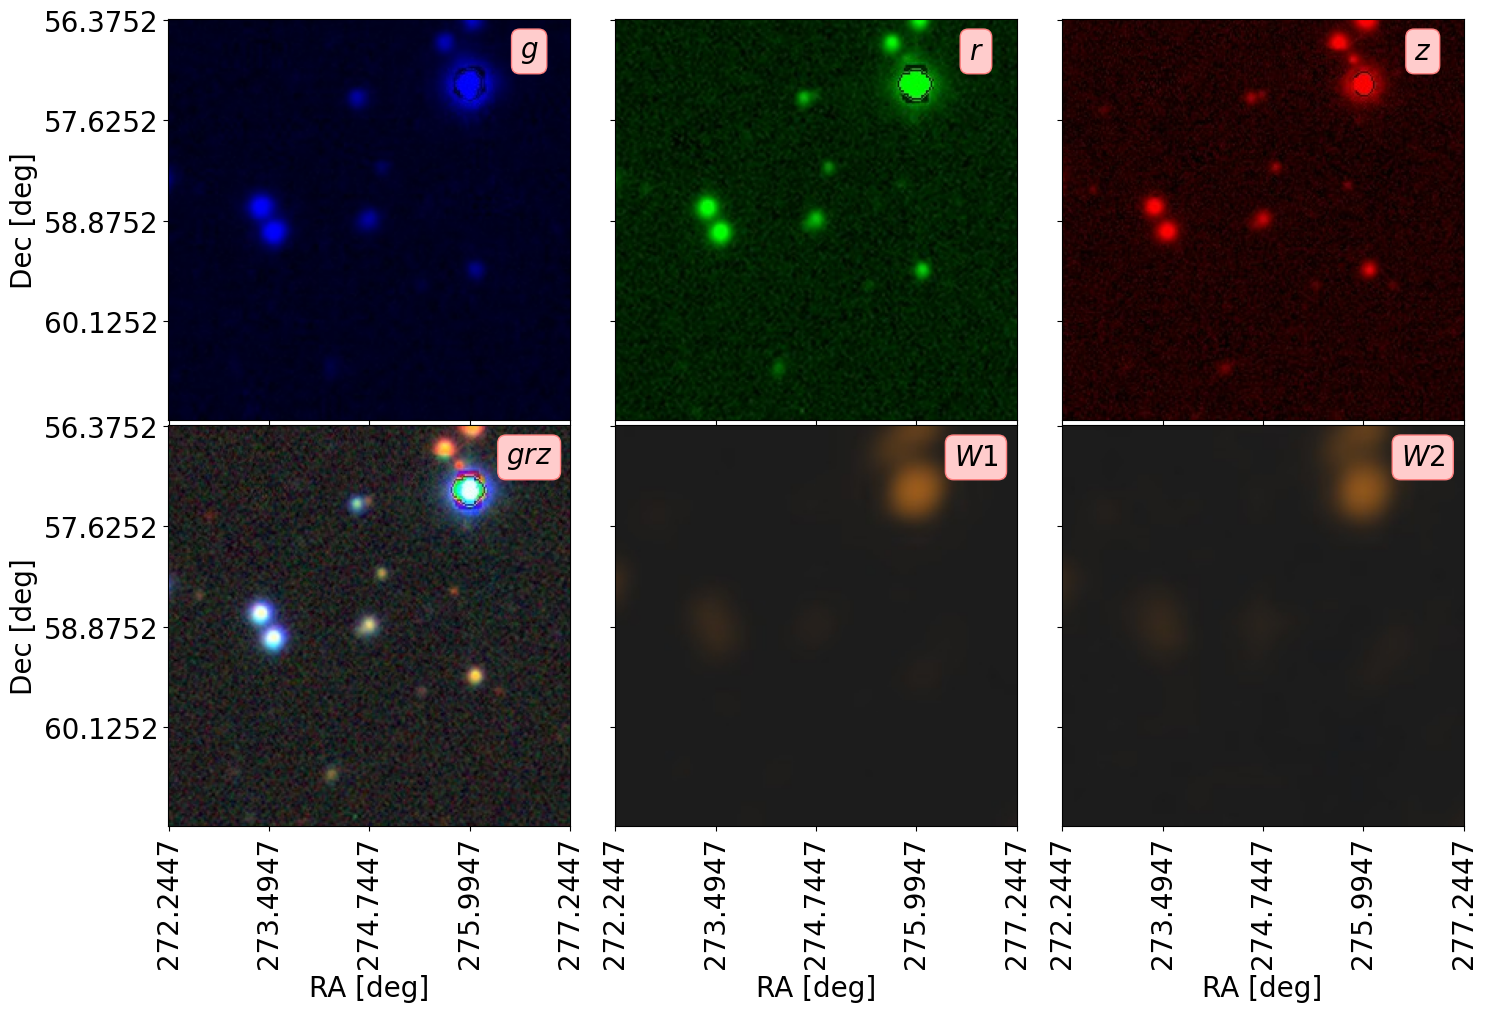

In [2]:
file = f'{path}/DESI_39633375564138178_274.7447421378237+58.87519622534547.fits'
h = fits.open(file)[0].header
TARGET_RA  = 274.7447421378237
TARGET_DEC = 58.87519622534547

#fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False))
fig, ax = pl.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,10))
pl.subplots_adjust(hspace=0.1)

bands = ['g','r','z','grz','W1','W2']
for i, band in enumerate(bands):
    pl.subplot(2,3,i+1)
    BAND_IMAGE = fits.open(file)[i+1].data
    pl.imshow(BAND_IMAGE)
    pl.text(230,20, fr'${band}$', size=20, backgroundcolor='white', ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
    if (i==0) or (i==3):
        pl.ylabel('Dec [deg]', fontsize=20)
        pl.yticks(np.linspace(0,256,5), np.around(np.linspace(-2.5,2.5,5)+TARGET_DEC,4), fontsize=20)
        
    if i>=3:
        pl.xlabel('RA [deg]', fontsize=20)
        pl.xticks(np.linspace(0,256,5), np.around(np.linspace(-2.5,2.5,5)+TARGET_RA,4), rotation=90, fontsize=20)    

    
pl.tight_layout()
pl.savefig(f'./figs/PHOTO.png',bbox_inches='tight')
pl.show()